#### Extraction code logic for all Shapefile Files

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import io
import matplotlib as mpl
import json
from get_plot import get_plot, get_full_plot
from scipy import sparse


coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.use('agg')
# mpl.rcParams['savefig.pad_inches'] = 0


# I have manually processed every file using this format

In [2]:
gdf = gpd.read_file(r"D:\Users\xubil\OneDrive\Documents\Wildfires Data\dmti_transmissionlines_2021_l_arc\dmti_transmissionlines_2021_l_arc.shp") # Path to the shapefile 

In [3]:
gdf = gdf.to_crs(4326)

### Plot Generation

Processing item  Lignes


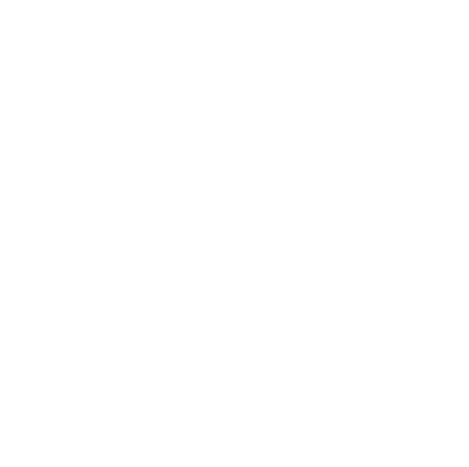

In [6]:
plots,titles = get_full_plot(gdf, "Lignes", "white") # The second parameter, "type" is changed depending on the Unique class's name we are extracting

### Define Limits

In [7]:
target_limit =  "limits_4326" #"limits_testing_9_chunks"
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

'''
where new_image is a figure.canvas.buffer_rgba() turned into a np matrix: 

nonzero_rows, nonzero_cols = np.nonzero(new_image) # Get all nonzero rows & collumns 

min_row, max_row = np.min(nonzero_rows), np.max(nonzero_rows)
min_col, max_col = np.min(nonzero_cols), np.max(nonzero_cols)
# After a series of test, (0, 575, 3, 764) was the exact fit of the canvas when the ration between width:height = 2:1

'''

min_row, max_row, min_col, max_col = 0, 575, 3, 764 
xyratio = 2/1

resx = 0.2
resy = resx/xyratio
n_chunkx = int(round((xmax-xmin)/resx, 1)) # MAKE SURE YOU CAN MATH: because we convert to int if you get 0.1232131 sketch 
n_chunky = int(round((ymax-ymin)/resy, 1)) # We're using round to not get like 2.9999999999999999997 make sure to get 0.3

# For Final Extraction: 
# x: 19.8/99 = 0.2 per chunk for 99 chunks
# y: 8/80 = 0.1 per chunk for 80 chunks

In [83]:
n_chunkx, n_chunky

(99, 80)

### Process by chunks

In [11]:
for item_idx in range(len(plots)):
    # Declare sparse matrix with a defined width, so we can concat later on axis = 0
    

    smat_item = sparse.csr_matrix(((max_row-min_row+1)*n_chunky, 0)) 

    plots[item_idx][0].tight_layout(pad=0, rect=(0,0,0,0))

    for x_idx in range(n_chunkx):
        # Similarly, declare a sparse matrix with a defined height for easier concat on axis = 1
        smat_chunk_row = sparse.csr_matrix((0, max_col-min_col+1))

        print(round(xmin+(x_idx)*resx, 1),
                round(xmin+(x_idx+1)*resx, 1))

        for y_idx in range(n_chunky):
            plots[item_idx][1].axis([
                round(xmin+(x_idx)*resx, 1),
                round(xmin+(x_idx+1)*resx, 1), # We don't want to get .00000000000000000000001 it's gonna ruin the perfect allignment,
                round(ymin+(y_idx)*resy, 1),
                round(ymin+(y_idx+1)*resy, 1)
            ])

            # print(round(xmin+(x_idx)*resx, 1),
            #     round(xmin+(x_idx+1)*resx, 1),
            #     round(ymin+(y_idx)*resy, 1),
            #     round(ymin+(y_idx+1)*resy, 1))
            
            plots[item_idx][0].canvas.draw()
            data = np.frombuffer(plots[item_idx][0].canvas.buffer_rgba(), dtype=np.uint8)
            image = data.reshape(plots[item_idx][0].canvas.get_width_height()[::-1] + (4,)) # Get the 3d array of the chunk
            new_image = np.round(np.squeeze(image[:, :, 3:])/255.0, 3)[:, min_col:max_col+1] # Convert to matrix & get relevant area only

            # print(new_image.shape)

            smat_chunk_row = sparse.vstack((sparse.csr_matrix(new_image), smat_chunk_row))
            del data, image, new_image # Save memory 
        
        # print(smat_chunk_row.shape, smat_item.shape)

        smat_item = sparse.hstack((smat_item, smat_chunk_row))
        del smat_chunk_row

    sparse.save_npz("data-sample/"+titles[item_idx]+".npz", smat_item) # Save the sparse matrix
    del smat_item # Free Up Memory
            

-80.4 -80.2
-80.2 -80.0
-80.0 -79.8
-79.8 -79.6
-79.6 -79.4
-79.4 -79.2
-79.2 -79.0
-79.0 -78.8
-78.8 -78.6
-78.6 -78.4
-78.4 -78.2
-78.2 -78.0
-78.0 -77.8
-77.8 -77.6
-77.6 -77.4
-77.4 -77.2
-77.2 -77.0
-77.0 -76.8
-76.8 -76.6
-76.6 -76.4
-76.4 -76.2
-76.2 -76.0
-76.0 -75.8
-75.8 -75.6
-75.6 -75.4
-75.4 -75.2
-75.2 -75.0
-75.0 -74.8
-74.8 -74.6
-74.6 -74.4
-74.4 -74.2
-74.2 -74.0
-74.0 -73.8
-73.8 -73.6
-73.6 -73.4
-73.4 -73.2
-73.2 -73.0
-73.0 -72.8
-72.8 -72.6
-72.6 -72.4
-72.4 -72.2
-72.2 -72.0
-72.0 -71.8
-71.8 -71.6
-71.6 -71.4
-71.4 -71.2
-71.2 -71.0
-71.0 -70.8
-70.8 -70.6
-70.6 -70.4
-70.4 -70.2
-70.2 -70.0
-70.0 -69.8
-69.8 -69.6
-69.6 -69.4
-69.4 -69.2
-69.2 -69.0
-69.0 -68.8
-68.8 -68.6
-68.6 -68.4
-68.4 -68.2
-68.2 -68.0
-68.0 -67.8
-67.8 -67.6
-67.6 -67.4
-67.4 -67.2
-67.2 -67.0
-67.0 -66.8
-66.8 -66.6
-66.6 -66.4
-66.4 -66.2
-66.2 -66.0
-66.0 -65.8
-65.8 -65.6
-65.6 -65.4
-65.4 -65.2
-65.2 -65.0
-65.0 -64.8
-64.8 -64.6
-64.6 -64.4
-64.4 -64.2
-64.2 -64.0
-64.0 -63.8
-63.

### Making Sure The Data is Perfectly Alligned This Time

In [38]:
a = sparse.load_npz("data-sample/Herbaçaie.npz")


In [41]:
a = a.todense()

In [89]:
a.shape

(1728, 2286)

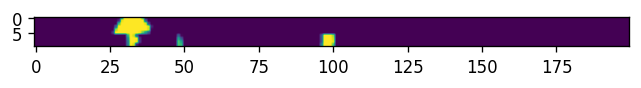

In [44]:
plt.imshow(a[570:580, 200:400])

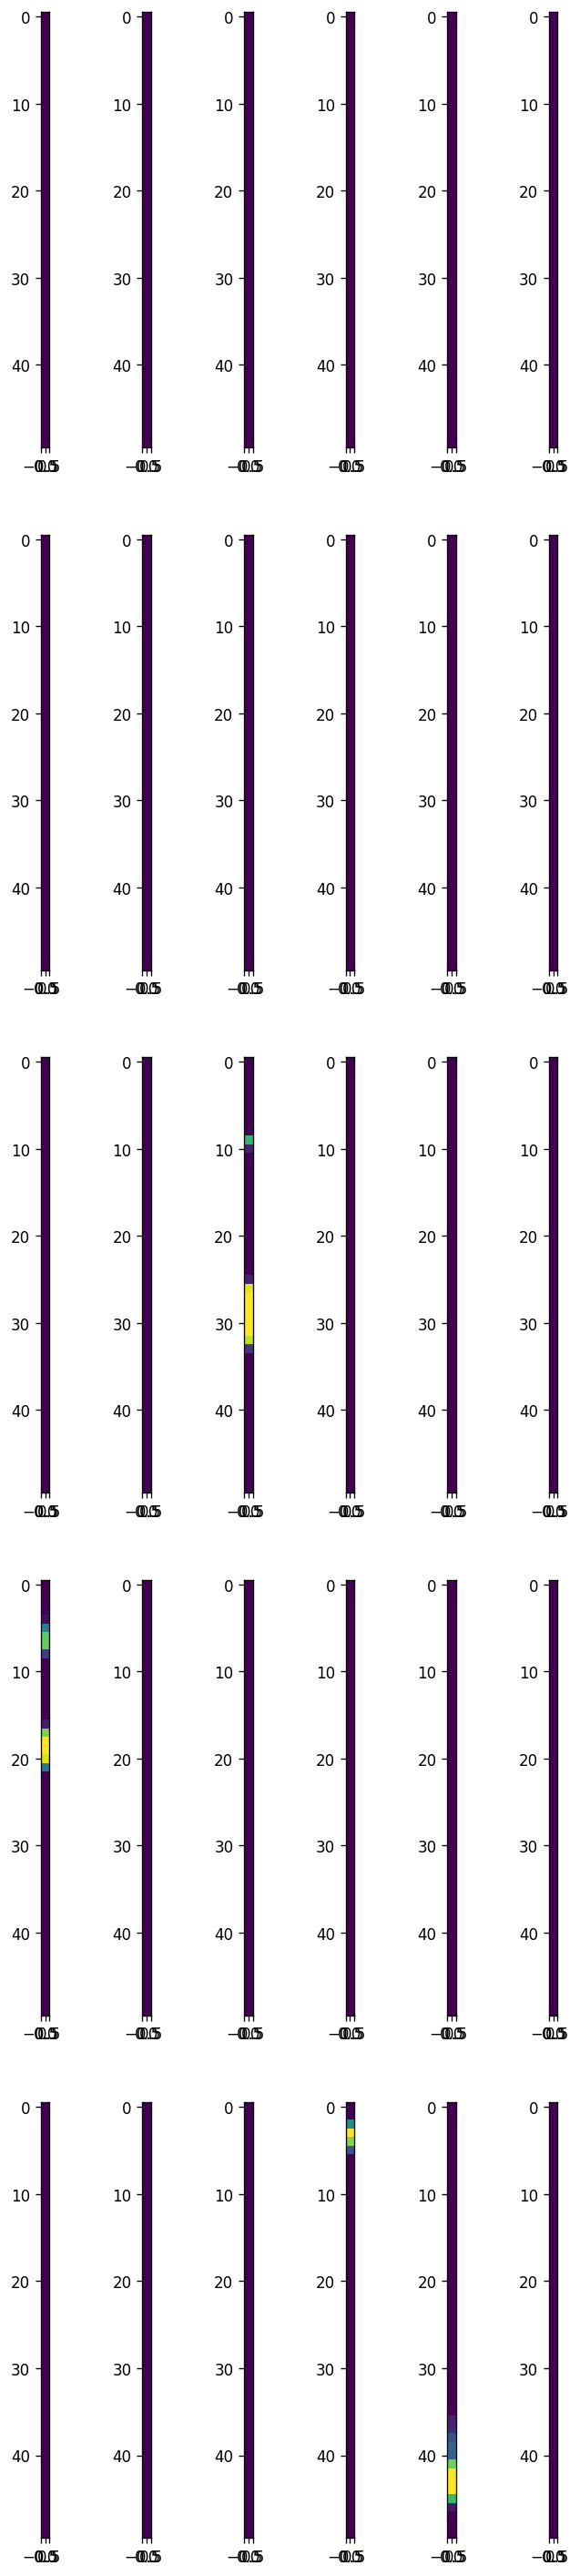

In [81]:
fig, axs = plt.subplots(5, 6, figsize=(7, 30))

curr_r = 0

for i in range(0, 30):
    if (curr_r == 0):
        test = i
    else:
        test = (i%(curr_r*6))

    # print(test)

    axs[curr_r, test].imshow(a[50*i:50*(i+1), 1524:1525])
    
    if (test == 5):
        curr_r+=1